In [18]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf

print(tf.__version__)

2.6.0


In [19]:
import pathlib
data_dir = '/root/tftest/ecg'
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/root/tftest/ecg')

In [20]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

165


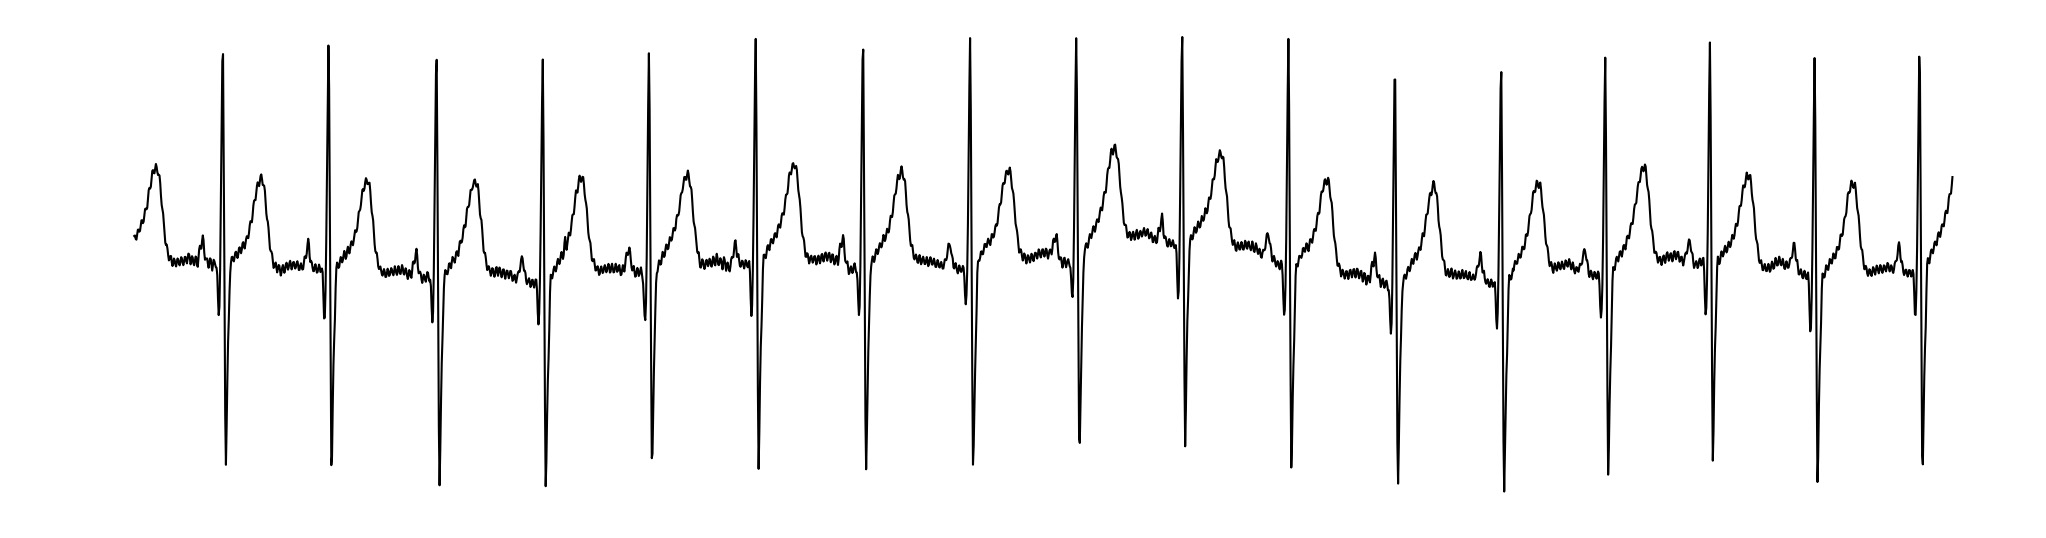

In [21]:
normal = list(data_dir.glob('normal/*'))
PIL.Image.open(str(normal[0]))

In [22]:
batch_size = 10
img_height = 180
img_width = 580

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 165 files belonging to 2 classes.
Using 132 files for training.


In [23]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 165 files belonging to 2 classes.
Using 33 files for validation.


In [24]:
class_names = train_ds.class_names
print(class_names)

['abnormal', 'normal']


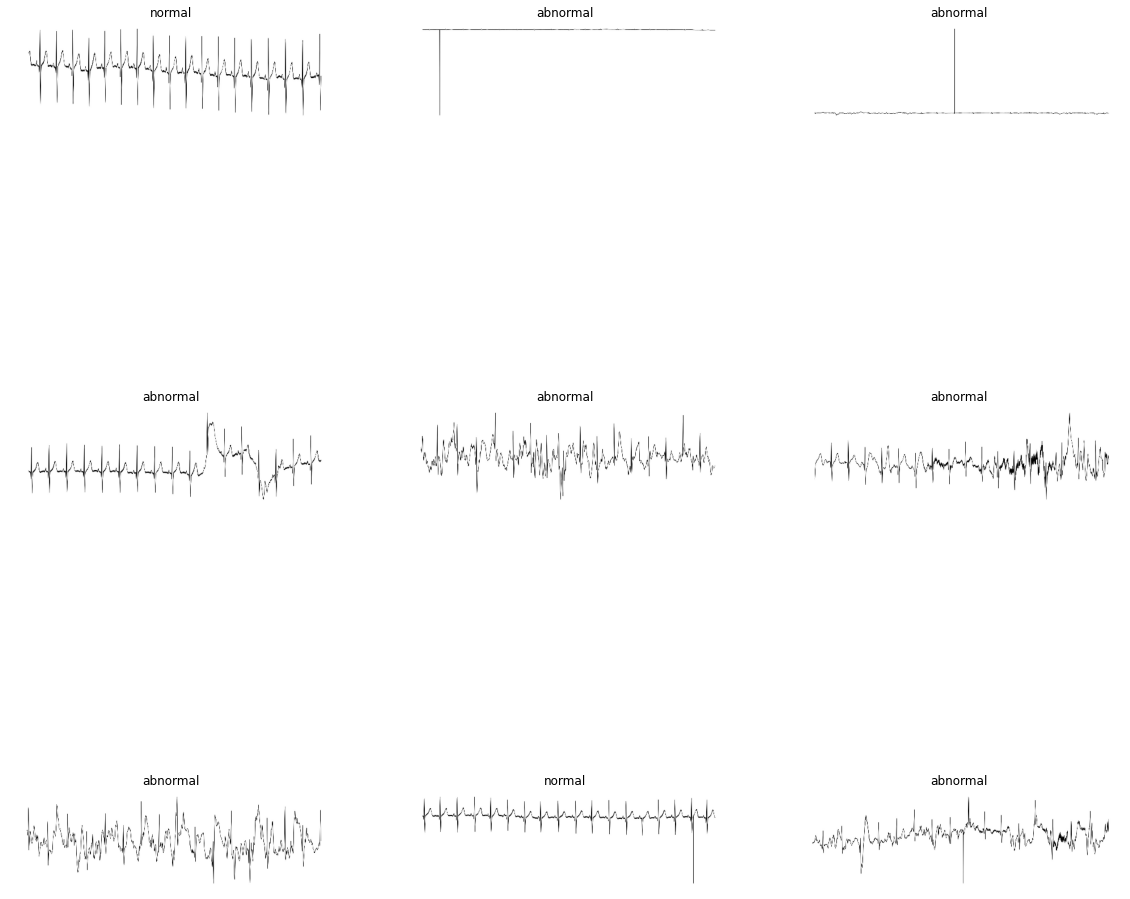

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [26]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(10, 180, 580, 3)
(10,)


In [27]:
num_classes = 2

model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [28]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [29]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=50
)

Epoch 1/50
14/14 [==============================] - 6s 424ms/step - loss: 437.0122 - accuracy: 0.5455 - val_loss: 230.5564 - val_accuracy: 0.1515
Epoch 2/50
14/14 [==============================] - 6s 410ms/step - loss: 23.1068 - accuracy: 0.5455 - val_loss: 0.3806 - val_accuracy: 0.8485
Epoch 3/50
14/14 [==============================] - 6s 415ms/step - loss: 0.4546 - accuracy: 0.8409 - val_loss: 0.6418 - val_accuracy: 0.7576
Epoch 4/50
14/14 [==============================] - 6s 415ms/step - loss: 0.6479 - accuracy: 0.7500 - val_loss: 0.4903 - val_accuracy: 0.8182
Epoch 5/50
14/14 [==============================] - 6s 416ms/step - loss: 0.3521 - accuracy: 0.8485 - val_loss: 0.3579 - val_accuracy: 0.8182
Epoch 6/50
14/14 [==============================] - 6s 414ms/step - loss: 0.3108 - accuracy: 0.9015 - val_loss: 0.3233 - val_accuracy: 0.8485
Epoch 7/50
14/14 [==============================] - 6s 413ms/step - loss: 0.4479 - accuracy: 0.8030 - val_loss: 0.6627 - val_accuracy: 0.8485
E

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 178, 578, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 89, 289, 32)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 87, 287, 32)       9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 43, 143, 32)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 41, 141, 32)       9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 20, 70, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 44800)            

In [31]:
model.save('ecg_test_model.h5')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


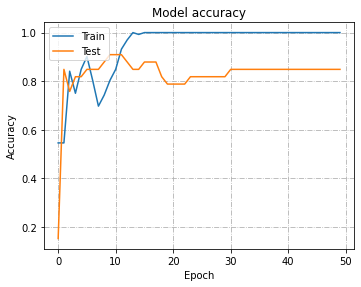

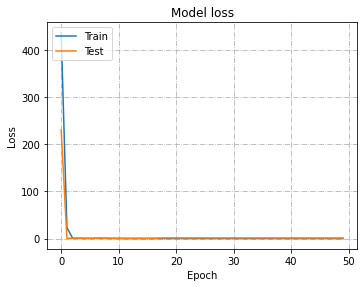

In [87]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
px = 1/plt.rcParams['figure.dpi']
plt.rcParams['figure.figsize'] = [400*px, 300*px]
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid(linestyle='-.')
plt.savefig('Acc.png', dpi=200)
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid(linestyle='-.')
plt.savefig('Loss.png', dpi=200)
plt.show()